# Práctica 4 - Andrés Velasco

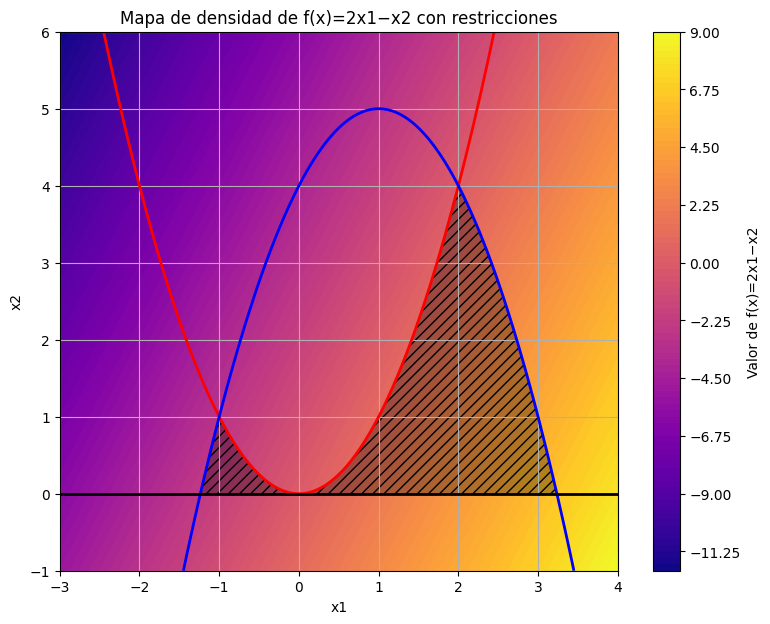

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el dominio
x1 = np.linspace(-3, 4, 400)
x2 = np.linspace(-1, 6, 400)
X1, X2 = np.meshgrid(x1, x2)

# Función objetivo
F = 2*X1 - X2

# Restricciones
G1 = -X1**2 + X2           # g1(x) <= 0
G2 = (X1-1)**2 + X2 - 5    # g2(x) <= 0
G3 = -X2                   # g3(x) <= 0

# Región factible
feasible = (G1 <= 0) & (G2 <= 0) & (G3 <= 0)

plt.figure(figsize=(9,7))

# Mapa de densidad (color) de f
densidad = plt.contourf(X1, X2, F, levels=100, cmap='plasma')
plt.colorbar(densidad, label='Valor de f(x)=2x1−x2')

# Dibujar las fronteras de restricciones
plt.contour(X1, X2, G1, levels=[0], colors='r', linewidths=2)
plt.contour(X1, X2, G2, levels=[0], colors='b', linewidths=2)
plt.contour(X1, X2, G3, levels=[0], colors='k', linewidths=2)

# Región factible hachurada
plt.contourf(X1, X2, feasible, levels=[0.5, 1], colors='none', hatches=['///'], alpha=0.3)



# Etiquetas y leyenda
plt.title("Mapa de densidad de f(x)=2x1−x2 con restricciones")
plt.xlabel('x1')
plt.ylabel('x2')

plt.grid(True)
plt.show()


In [3]:
import sympy as sp

# Variables
x1, x2 = sp.symbols('x1 x2', real=True)
l1, l2, l3 = sp.symbols('l1 l2 l3', real=True, nonnegative=True)

# Función objetivo
f = 2*x1 - x2

# Restricciones
g1 = -x1**2 + x2
g2 = (x1 - 1)**2 + x2 - 5
g3 = -x2

# Gradientes
grad_f = [sp.diff(f, x1), sp.diff(f, x2)]
grad_g1 = [sp.diff(g1, x1), sp.diff(g1, x2)]
grad_g2 = [sp.diff(g2, x1), sp.diff(g2, x2)]
grad_g3 = [sp.diff(g3, x1), sp.diff(g3, x2)]

# Condiciones de estacionariedad (gradiente Lagrangiano = 0)
eq1 = grad_f[0] + l1*grad_g1[0] + l2*grad_g2[0] + l3*grad_g3[0]
eq2 = grad_f[1] + l1*grad_g1[1] + l2*grad_g2[1] + l3*grad_g3[1]

# Complementariedad
eq3 = l1*g1
eq4 = l2*g2
eq5 = l3*g3

# Sistema KKT
solutions = sp.solve(
    [eq1, eq2, eq3, eq4, eq5],
    [x1, x2, l1, l2, l3],
    dict=True
)

# Filtrar soluciones factibles
kkt_points = []
for sol in solutions:
    x1v, x2v = sol[x1], sol[x2]
    g1v, g2v, g3v = g1.subs(sol), g2.subs(sol), g3.subs(sol)
    lambdas = [sol[l1], sol[l2], sol[l3]]
    feasible = (g1v <= 0) and (g2v <= 0) and (g3v <= 0)
    nonneg = all([lv >= 0 for lv in lambdas])
    if feasible and nonneg:
        kkt_points.append({
            'x': (float(x1v), float(x2v)),
            'lambdas': [float(lv) for lv in lambdas],
            'fval': float(f.subs(sol))
        })

print("Puntos KKT factibles encontrados:")
for k in kkt_points:
    print(f"x* = {k['x']},  λ = {k['lambdas']},  f(x*) = {k['fval']:.3f}")


Puntos KKT factibles encontrados:
x* = (-1.0, 1.0),  λ = [0.3333333333333333, 0.6666666666666666, 0.0],  f(x*) = -3.000
x* = (2.0, 4.0),  λ = [0.6666666666666666, 0.3333333333333333, 0.0],  f(x*) = 0.000
x* = (1.0, 1.0),  λ = [1.0, 0.0, 0.0],  f(x*) = 1.000


### b) Identificación del óptimo

De las candidatas factibles que cumplen las condiciones KKT, los valores de la función objetivo son:

- $f(-1,1) = -3$  
- $f(2,4) = 0$  
- $f(1,1) = 1$  

Por lo tanto, el **mínimo** se alcanza en:

$\mathbf{x}^* = (-1, 1)$

con valor óptimo:

$f(-1,1) = -3$

Este punto es factible (todos los $g_i \le 0$) y los multiplicadores de Lagrange $\lambda_i \ge 0$ satisfacen la condición de estación:

$\nabla f + \sum_i \lambda_i \nabla g_i = 0$

Adicionalmente, un muestreo fino de la frontera factible confirmó que el valor mínimo en la región factible es efectivamente $-3$ en $(-1,1)$.


In [4]:
import numpy as np

# Función objetivo
def f(x):
    x1, x2 = x
    return 2*x1 - x2

def grad_f(x):
    # Gradiente de la función objetivo
    return np.array([2, -1])

# Restricciones g_i(x) <= 0
def g1(x):
    x1, x2 = x
    return -x1 + x2

def g2(x):
    x1, x2 = x
    return (x1 - 1)**2 + x2 - 5

def g3(x):
    x1, x2 = x
    return -x2

# Gradientes de las restricciones
def grad_g1(x):
    return np.array([-1, 1])

def grad_g2(x):
    x1, x2 = x
    return np.array([2*(x1 - 1), 1])

def grad_g3(x):
    return np.array([0, -1])

# Listas de restricciones y gradientes
g_list = [g1, g2, g3]
grad_g_list = [grad_g1, grad_g2, grad_g3]



# Algoritmo de Zoutendijk
def zoutendijk_step(x0):
    x = x0.copy()
    for iter_num in range(2):  # Realizamos dos iteraciones
        grad = grad_f(x)
        
        # Determinar conjunto activo (restricciones activas)
        active_constraints = []
        active_grads = []
        for i, g in enumerate(g_list):
            if abs(g(x)) < 1e-6:  # Umbral para activas
                active_constraints.append(i)
                active_grads.append(grad_g_list[i](x))
        
        # Direccion factible: d perpendicular a gradientes activas
        if active_grads:
            A = np.array(active_grads)
            # Resolver A d = 0 (aproximación)
            # Usamos proyección de gradiente sobre espacio factible
            d = -grad + A.T @ np.linalg.pinv(A @ A.T) @ (A @ grad)
        else:
            d = -grad  # Sin restricciones activas, dirección descendente

        # Determinar paso alfa factible
        alpha_max = 1e6
        for i, g in enumerate(g_list):
            gi_grad = grad_g_list[i](x)
            if np.dot(gi_grad, d) > 0:  # Evitar salir de la factibilidad
                alpha = -g_list[i](x) / np.dot(gi_grad, d)
                if alpha < alpha_max:
                    alpha_max = alpha
        
        # Actualizamos el punto
        x = x + 0.5 * alpha_max * d  # Usamos mitad del paso para seguridad
        print(f"Iteración {iter_num+1}: x = {x}, f(x) = {f(x)}")
    
    return x

# Punto inicial
x0 = np.array([2.0, 1.0])

# Ejecutamos el algoritmo
x_opt = zoutendijk_step(x0)

Iteración 1: x = [1.66666667 1.16666667], f(x) = 2.166666666666667
Iteración 2: x = [1.5  1.25], f(x) = 1.75


/tmp/ipykernel_43700/954688161.py:28: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, G1, levels=[0], colors='r', linewidths=2, label='g1')
/tmp/ipykernel_43700/954688161.py:29: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, G2, levels=[0], colors='b', linewidths=2, label='g2')
/tmp/ipykernel_43700/954688161.py:30: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, G3, levels=[0], colors='g', linewidths=2, label='x1>=0')
/tmp/ipykernel_43700/954688161.py:31: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, G4, levels=[0], colors='k', linewidths=2, label='x2>=0')


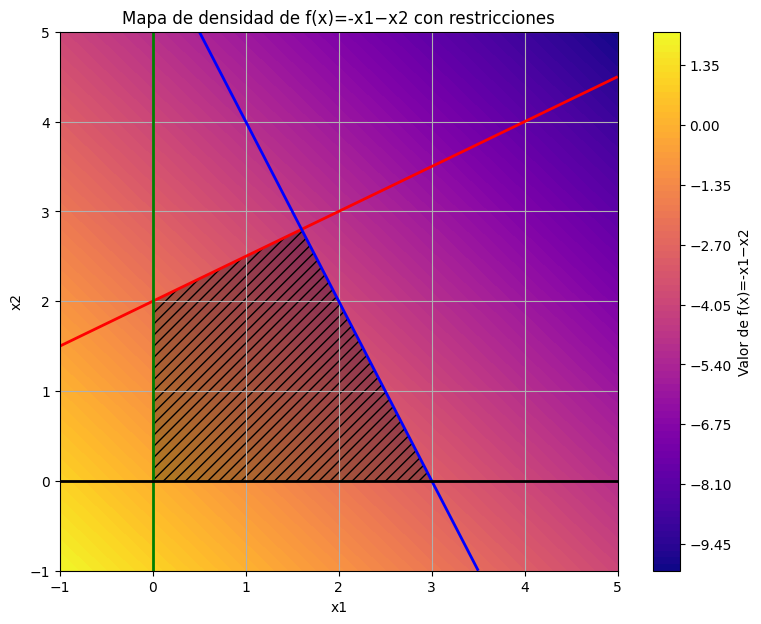

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el dominio
x1 = np.linspace(-1, 5, 400)
x2 = np.linspace(-1, 5, 400)
X1, X2 = np.meshgrid(x1, x2)

# Función objetivo
F = -X1 - X2

# Restricciones
G1 = -X1 + 2*X2 - 4   # g1(x) <= 0
G2 = 2*X1 + X2 - 6    # g2(x) <= 0
G3 = -X1               # x1 >= 0 -> -x1 <= 0
G4 = -X2               # x2 >= 0 -> -x2 <= 0

# Región factible
feasible = (G1 <= 0) & (G2 <= 0) & (G3 <= 0) & (G4 <= 0)

plt.figure(figsize=(9,7))

# Mapa de densidad (color) de f
densidad = plt.contourf(X1, X2, F, levels=100, cmap='plasma')
plt.colorbar(densidad, label='Valor de f(x)=-x1−x2')

# Dibujar las fronteras de restricciones
plt.contour(X1, X2, G1, levels=[0], colors='r', linewidths=2, label='g1')
plt.contour(X1, X2, G2, levels=[0], colors='b', linewidths=2, label='g2')
plt.contour(X1, X2, G3, levels=[0], colors='g', linewidths=2, label='x1>=0')
plt.contour(X1, X2, G4, levels=[0], colors='k', linewidths=2, label='x2>=0')

# Región factible hachurada
plt.contourf(X1, X2, feasible, levels=[0.5, 1], colors='none', hatches=['///'], alpha=0.3)

# Etiquetas y leyenda
plt.title("Mapa de densidad de f(x)=-x1−x2 con restricciones")
plt.xlabel('x1')
plt.ylabel('x2')

plt.grid(True)
plt.show()


In [32]:
import numpy as np

# Definimos datos del problema
c = np.array([-1, -1])       # Coeficientes de la función objetivo
A = np.array([[-1, 2],
              [2, 1]])       # Matriz de restricciones
b = np.array([4, 6])         # Lado derecho
m, n = A.shape

# Parámetros del algoritmo
rho = 0.9
sigma = 0.5
epsilon = 1e-6


x = A.T @ np.linalg.inv(A @ A.T) @ b
u = np.linalg.inv(A @ A.T) @ A @ c
s = c - A.T @ u




print(delxx, delss)

print(f"Punto inicial factible:\nx = {x}\nu = {u}\ns = {s}\n")
print(s @ x)  # Producto complementario inicial




0.8000000000000002 4.03717463500057e-17
Punto inicial factible:
x = [1.6 2.8]
u = [-0.2 -0.6]
s = [2.22044605e-16 0.00000000e+00]

3.5527136788005016e-16


In [49]:
import numpy as np

# -----------------------------
# Datos del problema
# -----------------------------
c = np.array([-1, -1])
A = np.array([[-1, 2],
              [2, 1]])
b = np.array([4, 6])
m, n = A.shape

# Parámetros del algoritmo
rho = 0.9
sigma = 0.5

# -----------------------------
# Punto inicial
x = np.array([1, 1])

# u inicial aproximado
u = np.array([0,0])
print(x,u)
# Multiplicadores slack s
s = c - A.T @ u

# Ajuste para factibilidad inicial
min_x = np.min(x)
min_s = np.min(s)
del_x = max(-1.5 * min_x, 0)
del_s = max(-1.5 * min_s, 0)
x = x + del_x * np.ones(n)
s = s + del_s * np.ones(n)

# Corrección central
delxx = 0.5 * (x @ s) / np.sum(s)
delss = 0.5 * (x @ s) / np.sum(x)
x = x + delxx * np.ones(n)
s = s + delss * np.ones(n)

print("Punto inicial tras ajuste/corrección central:")
print("x =", x)
print("s =", s)
print("Producto complementario x^T s =", x @ s)
print("Valor función objetivo =", c @ x)
print("-" * 40)

for iter_num in range(2):  # hacemos 2 iteraciones
    X = np.diag(x)
    S = np.diag(s)
    mu = sigma * (x @ s) / n

    # Sistema KKT
    KKT_matrix = np.block([
        [S, np.zeros((n, n)), X],
        [A, np.zeros((m, n)), np.zeros((m, n))],
        [np.zeros((n, m)), A.T, np.eye(n)]
    ])
    
    rhs = np.concatenate([
        mu*np.ones(n) - X @ S @ np.ones(n),
        b - A @ x,
        c - A.T @ u - s
    ])
    # impirme KKT_MATRix bonito

    np.set_printoptions(precision=3, suppress=True)  # precisión de 3 decimales y sin notación científica
    print(f"\nMatriz KKT en iteración {iter_num+1}:")
    print(KKT_matrix)

    print(rhs)



    # Resolver KKT
    sol = np.linalg.solve(KKT_matrix, rhs)
    dx = sol[:n]
    du = sol[n:n+m]
    ds = sol[n+m:]
    print(sol)
    print(dx,du,ds)

    # -----------------------------
    # Comprobaciones de factibilidad según pseudocódigo
    # -----------------------------
    if np.any(ds >= 0):
        print("No existe solución factible. Fin del algoritmo.")
        break

    if np.any(dx >= 0):
        print("Solución no acotada. Fin del algoritmo.")
        break

    # -----------------------------
    # Calcular pasos factibles
    # -----------------------------
    neg_dx = [-x[i]/dx[i] for i in range(n) if dx[i] < 0]
    alpha_p = rho * min(neg_dx) if neg_dx else 1.0

    neg_ds = [-s[i]/ds[i] for i in range(n) if ds[i] < 0]
    alpha_d = rho * min(neg_ds) if neg_ds else 1.0

    # -----------------------------
    # Actualización
    # -----------------------------
    x = x + alpha_p * dx
    u = u + alpha_d * du
    s = s + alpha_d * ds


[1 1] [0 0]
Punto inicial tras ajuste/corrección central:
x = [1.5 1.5]
s = [0.75 0.75]
Producto complementario x^T s = 2.25
Valor función objetivo = -3.0
----------------------------------------

Matriz KKT en iteración 1:
[[ 0.75  0.    0.    0.    1.5   0.  ]
 [ 0.    0.75  0.    0.    0.    1.5 ]
 [-1.    2.    0.    0.    0.    0.  ]
 [ 2.    1.    0.    0.    0.    0.  ]
 [ 0.    0.   -1.    2.    1.    0.  ]
 [ 0.    0.    2.    1.    0.    1.  ]]
[-0.562 -0.562  2.5    1.5   -1.75  -1.75 ]
[ 0.1    1.3   -0.025 -0.675 -0.425 -1.025]
[0.1 1.3] [-0.025 -0.675] [-0.425 -1.025]
Solución no acotada. Fin del algoritmo.
